In [1]:
pip install tushare

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tushare as ts
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
ts.set_token('293d683e83b36fad82472d9a4b4c3903d21fa6bcb85cb0cd4f4b9414')
pro = ts.pro_api()
df = pro.daily(ts_code='000001.SZ', start_date='2010-01-01', end_date='2022-12-31')

print scatter plot to show relations between different features

Text(0, 0.5, 'Close')

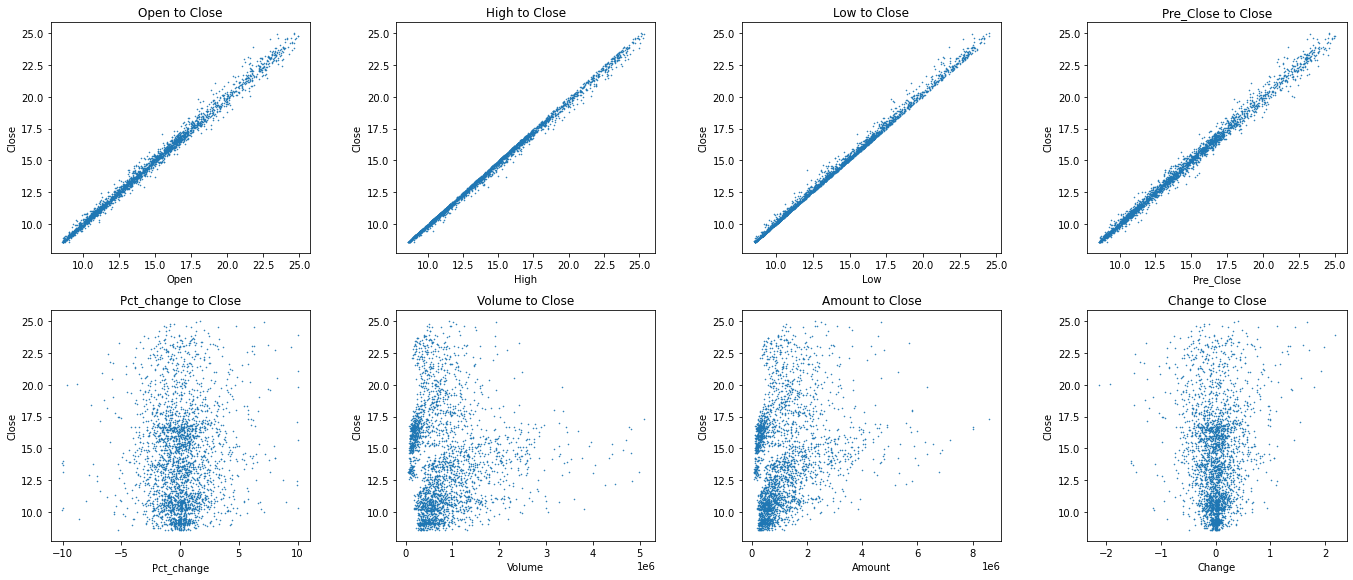

In [4]:
plt.axes([0,0,0.6,0.8])
plt.scatter(df.open,df.close,0.3)
plt.title('Open to Close')
plt.xlabel('Open')
plt.ylabel('Close')

plt.axes([0.8,0,0.6,0.8])
plt.scatter(df.high,df.close,0.3)
plt.title('High to Close')
plt.xlabel('High')
plt.ylabel('Close')

plt.axes([1.6,0,0.6,0.8])
plt.scatter(df.low,df.close,0.3)
plt.title('Low to Close')
plt.xlabel('Low')
plt.ylabel('Close')

plt.axes([2.4,0,0.6,0.8])
plt.scatter(df.pre_close,df.close,0.3)
plt.title('Pre_Close to Close')
plt.xlabel('Pre_Close')
plt.ylabel('Close')

plt.axes([0,-1,0.6,0.8])
plt.scatter(df.pct_chg,df.close,0.3)
plt.title('Pct_change to Close')
plt.xlabel('Pct_change')
plt.ylabel('Close')

plt.axes([0.8,-1,0.6,0.8])
plt.scatter(df.vol,df.close,0.3)
plt.title('Volume to Close')
plt.xlabel('Volume')
plt.ylabel('Close')

plt.axes([1.6,-1,0.6,0.8])
plt.scatter(df.amount,df.close,0.3)
plt.title('Amount to Close')
plt.xlabel('Amount')
plt.ylabel('Close')

plt.axes([2.4,-1,0.6,0.8])
plt.scatter(df.change,df.close,0.3)
plt.title('Change to Close')
plt.xlabel('Change')
plt.ylabel('Close')

show correlation between different features

<AxesSubplot:>

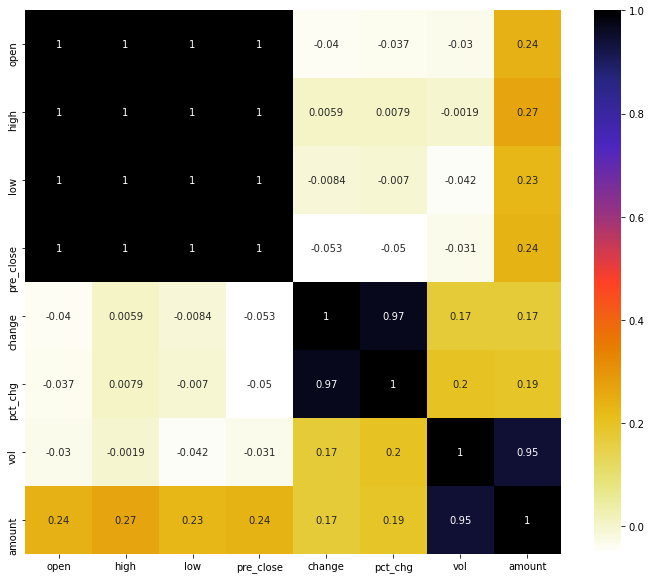

In [5]:
x = df
y = x.close
x = x.drop(['close'],axis=1)
plt.figure(figsize=(12,10))
corr = x.corr()
sb.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)


a function to drop the features that has higher correlation value than the threshold

In [6]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

drop the selected features and print the correlations map again

['high', 'amount', 'pre_close', 'pct_chg', 'low']


<AxesSubplot:>

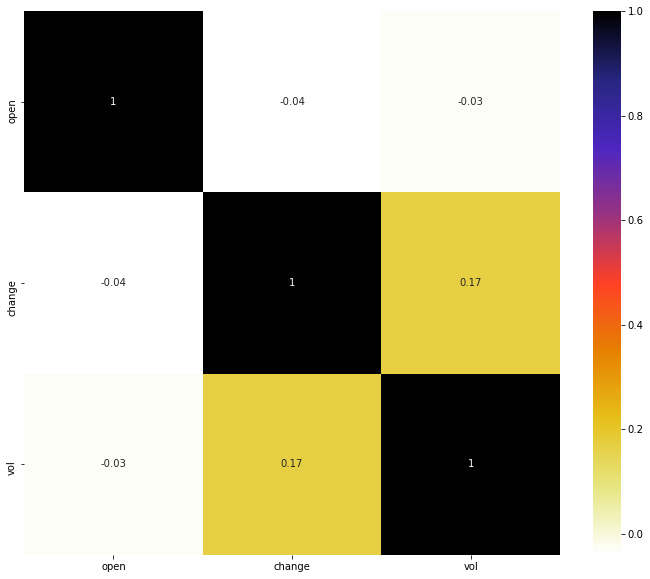

In [7]:
corr_features = correlation(x, 0.7)
corr_features = list(corr_features)
print(corr_features)

x = x.drop(corr_features,axis=1)
plt.figure(figsize=(12,10))
corr = x.corr()
sb.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

print histograms to check for outliers

Text(0.5, 1.0, 'Close spead')

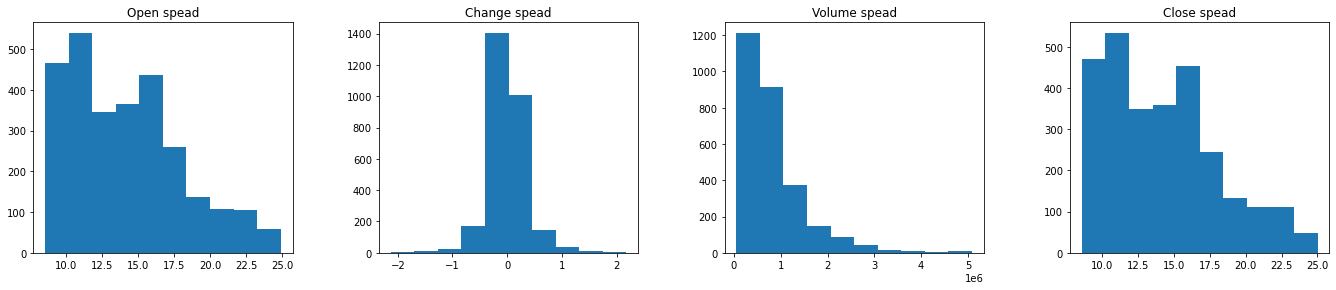

In [8]:
plt.axes([0,-1,0.6,0.8])
plt.hist(x.open)
plt.title("Open spead")


plt.axes([0.8,-1,0.6,0.8])
plt.hist(x.change)
plt.title("Change spead")

plt.axes([1.6,-1,0.6,0.8])
plt.hist(x.vol)
plt.title("Volume spead")

plt.axes([2.4,-1,0.6,0.8])
plt.hist(y)
plt.title("Close spead")
